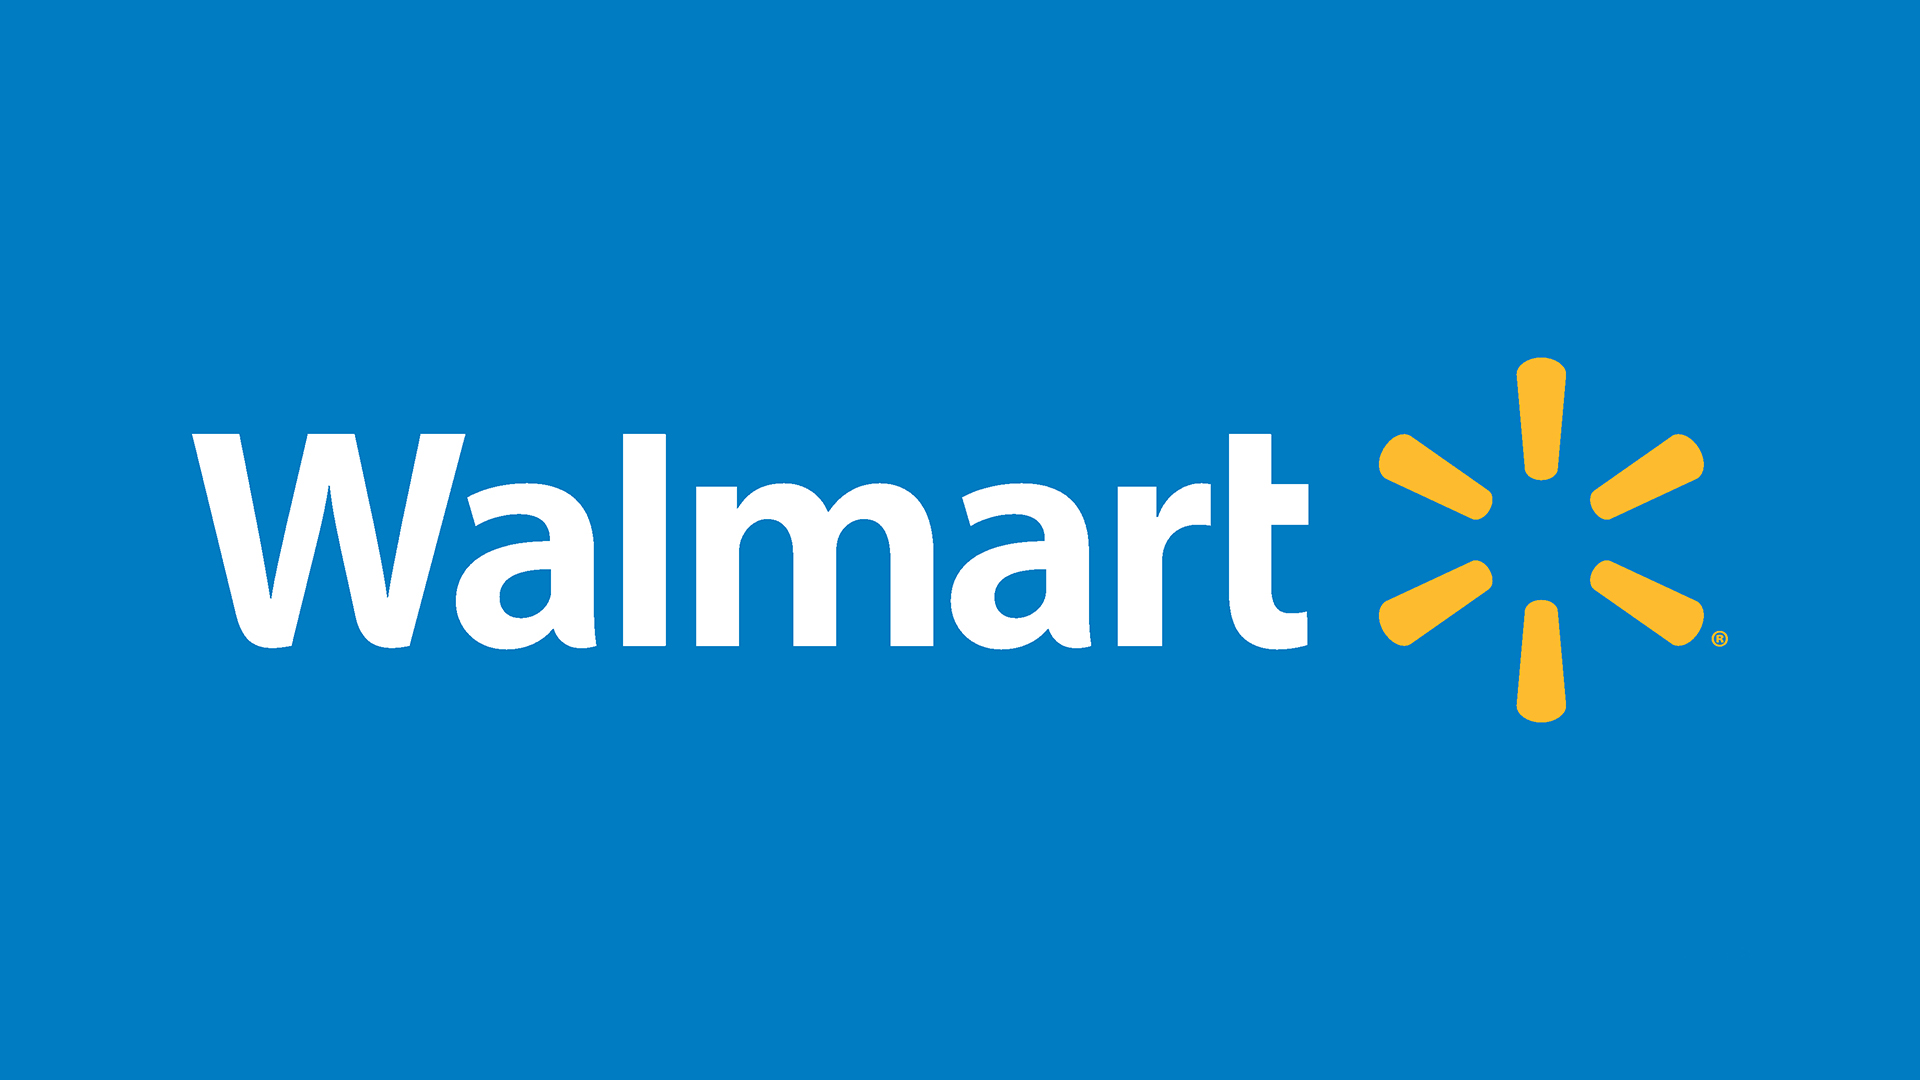

## <span style="color:green">**About Walmart** </span>
#### <span style="color: black;">Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.</span>


### **Problem Statement**
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### **Tasks**

#### **Task 1: Analyzing Basic Metrics**
#### **Task 2: Data Preprocessing**
#### **Task 3: Non Graphical Analysis**
#### **Task 4: Visual Analysis**
##### **Sub Task 1: Univariate Analysis**
##### **Sub Task 2: Bivariate Analysis**
##### **Sub Task 3: Multivariate Analysis**
##### **Sub Task 4: Indepth Analysis using CLT & Confidence Interval for 'Gender' , 'Marital_Status' & 'Age'**
#### **Task 5: Actionable Insights**
#### **Task 6: Recommendations**

## **Data Source**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

[Walmart Data](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094)

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount


#### **Task 1: Analyzing Basic Metrics**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
from scipy.stats import chi2_contingency
import scipy.stats as stats
import math

In [ ]:
#Let's import the dataset and read it as dataframe

!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094


Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 147MB/s] 


In [ ]:
walmart_df = pd.read_csv('walmart_data.csv?1641285094')
walmart_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
#Let's check the shape of data
walmart_df.shape

(550068, 10)

In [ ]:
# Let's check the datatypes
walmart_df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
# Let's check the presence of null values columnwise
walmart_df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
# Let's check the presence of duplicated values

walmart_df.duplicated().sum()

0

In [ ]:
#Let's check the presence of unique values
walmart_df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


#### The dataset contains 10 variables and 550068 observations.
#### Out of all the variables, User_ID, Occupation, Marital_Status, Product_Catgory & Purchase are of integer type and remaining columns are object type. However, we need toc onvert most variables into categorical type for our analysis in data preprocessing step.
#### Our dataset has no missing values and no duplicate values.

#### **Task 2: Data Preprocessing**

In [ ]:
# In our data, columns like
#Gender
#Age
#Occupation
#City_Category
#Stay_In_Current_City_Years
#Marital_Status
#Product_Category
# should be of categorical. So let's convert accordingly

cols_to_convert = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']

for col in cols_to_convert:
  walmart_df[cols_to_convert]= walmart_df[cols_to_convert].astype('category')

walmart_df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,category
Age,category
Occupation,category
City_Category,category
Stay_In_Current_City_Years,category
Marital_Status,category
Product_Category,category
Purchase,int64


In [ ]:
# Let's check the summary statistics of our data
walmart_df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


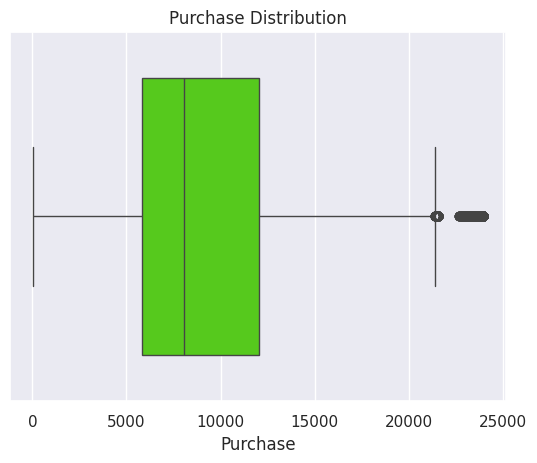

In [ ]:
#Given the Purchase column being numerical, let's check the presence of outliers
#Let's use box plot
sns.boxplot(data= walmart_df, x= 'Purchase', color = '#4ce600', width = 0.75)
plt.title("Purchase Distribution")
plt.show()


##### These outliers suggest that there are some customers with significantly higher purchase amounts. However, to get better understanding, let's go for the **IQR Method**.

In [ ]:
#Let's calculate quartiles
q1 = np.percentile(walmart_df['Purchase'],25)
q3 = np.percentile(walmart_df['Purchase'],75)
#..............
IQR = q3-q1
#..............
#Let's get the upper bound for outliers
upper_bound = q3+ (1.5 * IQR)

#Let's get the lower bound for outliers
lower_bound = q1 - (1.5 *IQR)

# Let's get outliers in the specified column
upper_outliers_df = walmart_df[walmart_df['Purchase'] > upper_bound]
lower_outliers_df = walmart_df[walmart_df['Purchase'] < lower_bound]

# Count of outliers
upper_count = len(upper_outliers_df)
lower_count = len(lower_outliers_df)

total_count = upper_count + lower_count

print(f"Upper Outliers Count: {upper_count}")
print(f"Lower Outliers Count: {lower_count}")
print(f"Overall Outliers Count: {total_count}")

Upper Outliers Count: 2677
Lower Outliers Count: 0
Overall Outliers Count: 2677


##### **We have total of 2677 outliers in Purchase column.**

In [ ]:
# let's extract rows where 'Purchase' values are greater than the upper bound to identify outliers

outliers_df = walmart_df[walmart_df['Purchase'] > upper_bound]
outliers_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


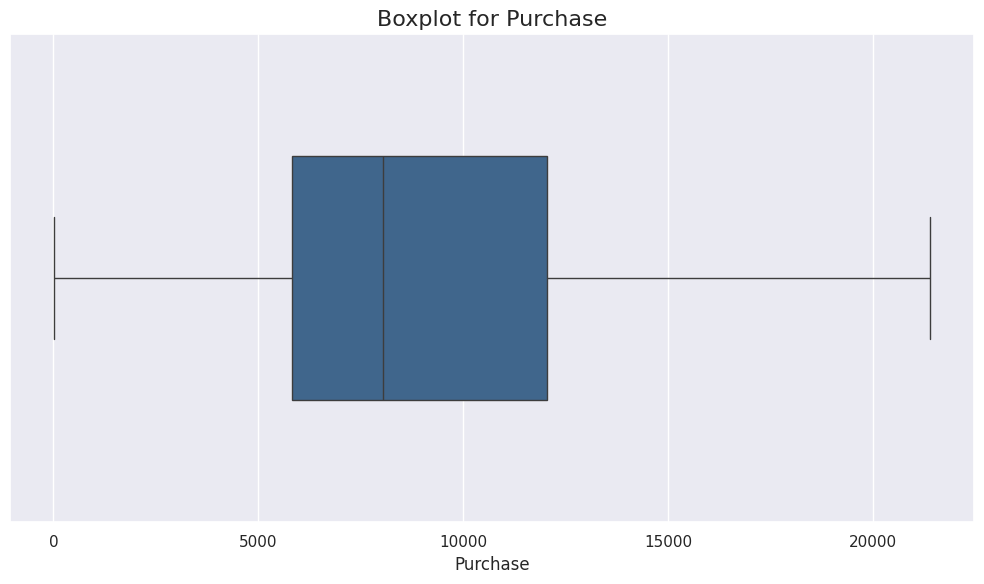

In [ ]:
clipped_data = np.clip(walmart_df['Purchase'], lower_bound, upper_bound)
plt.figure(figsize=(10, 6))

# Create a box plot for clipped data
sns.boxplot(x=clipped_data,color='#336699', width=0.5, orient='h')
plt.title('Boxplot for Purchase', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#Let's map numerical values in Marital_Status

walmart_df['Marital_Status'] = walmart_df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else ('Single' if x == 0 else x))
walmart_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [ ]:
walmart_df['Marital_Status'].unique()

['Single', 'Married']
Categories (2, object): ['Single', 'Married']

### **Task 3: Non Graphical Analysis**

In [ ]:
# Let's do valuecounts and unique attributes
# Let's do unique attribute counts
walmart_df['Gender'].unique()


['F', 'M']
Categories (2, object): ['F', 'M']

In [ ]:
#Let's do the value counts of columns
# Total number of transactions made by each gender
print(walmart_df['Gender'].value_counts())

print(np.round(walmart_df['Gender'].value_counts(normalize = True) * 100, 2))

Gender
M    414259
F    135809
Name: count, dtype: int64
Gender
M    75.31
F    24.69
Name: proportion, dtype: float64


In [ ]:
#Transactions made by different age groups
walmart_df['Age'].unique()

print(walmart_df['Age'].value_counts())

print(np.round(walmart_df['Age'].value_counts(normalize = True) * 100, 2))

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
Age
26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: proportion, dtype: float64


In [ ]:
#Transactions based on Occupation
walmart_df['Occupation'].unique()
print(walmart_df['Occupation'].value_counts())

print(np.round(walmart_df['Occupation'].value_counts(normalize = True) * 100, 2).sort_values(ascending= False))


Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64
Occupation
4     13.15
0     12.66
7     10.75
1      8.62
17     7.28
20     6.10
12     5.67
14     4.96
2      4.83
16     4.61
6      3.70
3      3.21
10     2.35
5      2.21
15     2.21
11     2.11
19     1.54
13     1.40
18     1.20
9      1.14
8      0.28
Name: proportion, dtype: float64


In [ ]:
# Transactions made in different city
walmart_df['City_Category'].unique()

print(walmart_df['City_Category'].value_counts())

print(np.round(walmart_df['City_Category'].value_counts(normalize = True) * 100, 2).sort_values(ascending= False))

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64
City_Category
B    42.03
C    31.12
A    26.85
Name: proportion, dtype: float64


In [ ]:
# Transactions based on Number of years stay in the city

walmart_df['Stay_In_Current_City_Years'].unique()

print(walmart_df['Stay_In_Current_City_Years'].value_counts())
print(np.round(walmart_df['Stay_In_Current_City_Years'].value_counts(normalize = True) * 100, 2).sort_values(ascending= False))

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64
Stay_In_Current_City_Years
1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: proportion, dtype: float64


In [ ]:
# Transactions based on Marital Status
walmart_df['Marital_Status'].unique()

print(walmart_df['Marital_Status'].value_counts())
print(np.round(walmart_df['Marital_Status'].value_counts(normalize= True) *100,2).sort_values(ascending = False))

Marital_Status
Single     324731
Married    225337
Name: count, dtype: int64
Marital_Status
Single     59.03
Married    40.97
Name: proportion, dtype: float64


In [ ]:
#Transactions based on Product Category

walmart_df['Product_Category'].unique()

print(walmart_df['Product_Category'].value_counts())
print(np.round(walmart_df['Product_Category'].value_counts(normalize= True) *100,2).sort_values(ascending = False))

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64
Product_Category
5     27.44
1     25.52
8     20.71
11     4.42
2      4.34
6      3.72
3      3.67
4      2.14
16     1.79
15     1.14
13     1.01
10     0.93
12     0.72
7      0.68
18     0.57
20     0.46
19     0.29
14     0.28
17     0.11
9      0.07
Name: proportion, dtype: float64


#### **Task 4: Visual Analysis**

##### **Sub Task 1: Univariate Analysis**
   


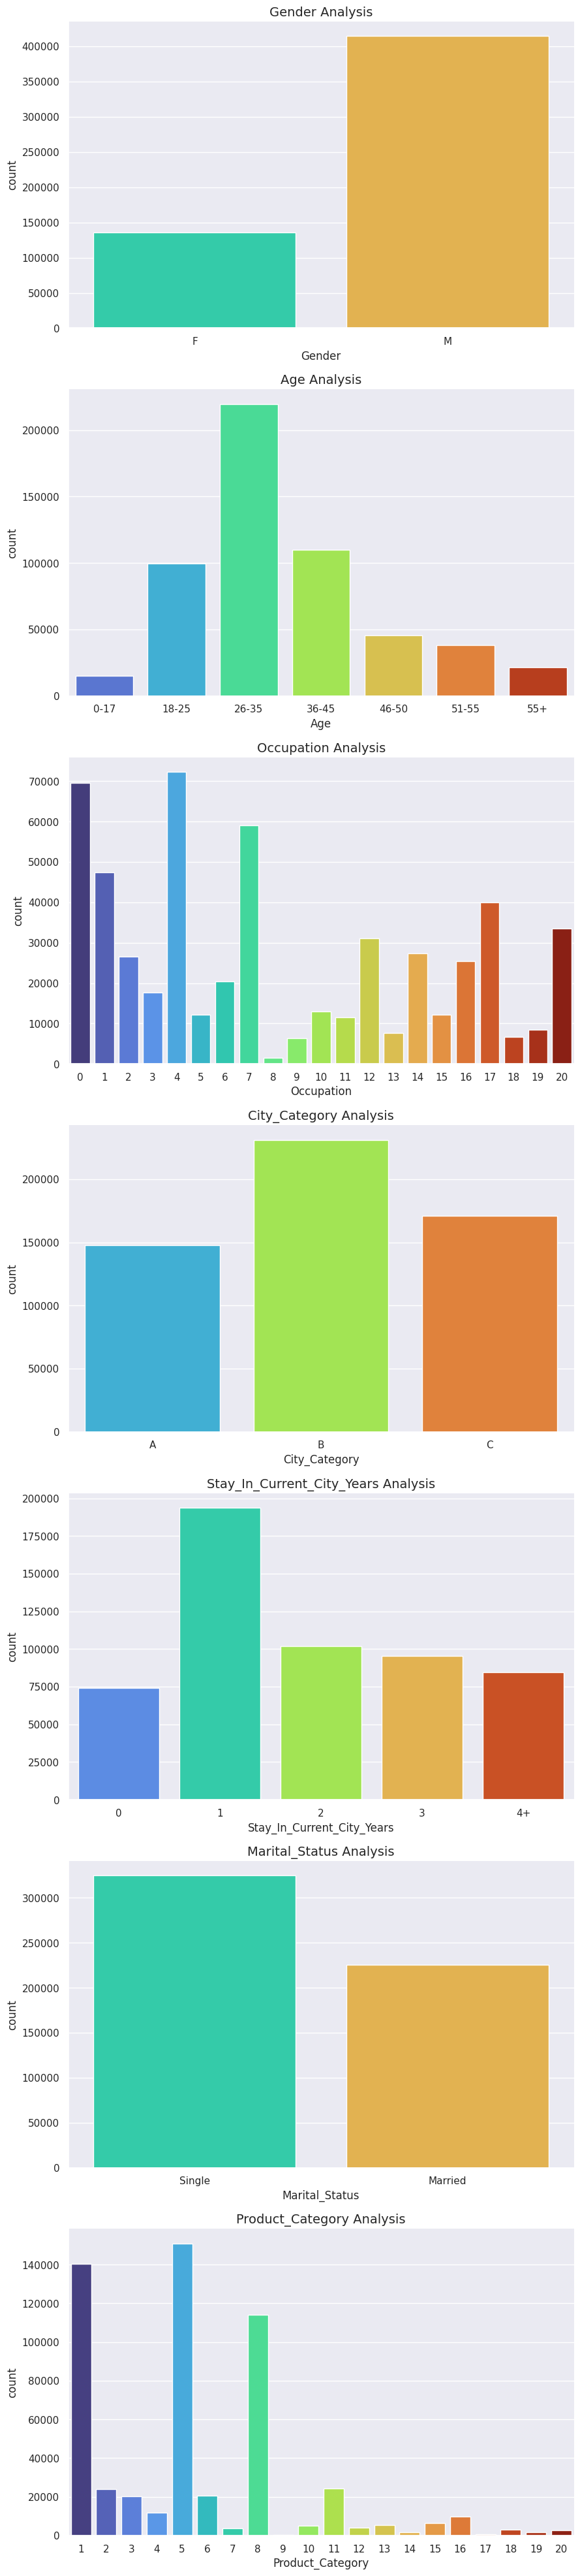

In [ ]:
#Let's do the univariate plots
columns = ['Gender','Age','Occupation', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status','Product_Category']

# Adjust figure size to accommodate all subplots
plt.figure(figsize=(10,50))
sns.set(style='darkgrid')

# Plotted each categorical column
for i, col in enumerate(columns, 1):
    # Create subplot with adjusted number of rows
    plt.subplot(len(columns), 1, i)
    sns.countplot(data=walmart_df, x=col, hue=col, palette='turbo', legend=False)
    sns.despine()
    plt.title(f'{col} Analysis', fontsize=14, fontfamily='sans-serif')

# Show the plot
plt.show()

#### **Insights**

##### **Gender Distribution:**
  The Males have approximately thrice purchase amount than Females.

##### **Age Group Distribution:**

  The age group '26-35' has the highest count, indicating that customers in this age range make the most purchases. It is followed by the age groups '36-45' and '18-25'.

##### **Occupation Analysis:**

  Occupation '4' has the highest count, suggesting that customers with occupation '4' have the highest representation in the dataset. Occupations '0', '7', and '1' also have significant counts.

##### **City Category Distribution:**

  City_Category 'B' has the highest count, indicating that customers from City_Category 'B' have made the most purchases. City_Category 'C' and 'A' follow in terms of count.

##### **Stay in Current City Impact:**

  Customers who have stayed in their current city for more than 1 year show a higher purchase tendency, suggesting a positive correlation between the duration of stay and purchasing behavior.

##### **Marital Status Impact:**

  Customers with a marital status of 'Single' have a higher count compared to those who are 'Married', suggesting that single individuals make more purchases in the dataset.

##### **Product Category Purchase Analysis:**

  Product categories '1' and '5' exhibit higher purchase amounts, indicating that these categories contribute significantly to the overall sales revenue.


##### **Sub Task 2: Bivariate Analysis**

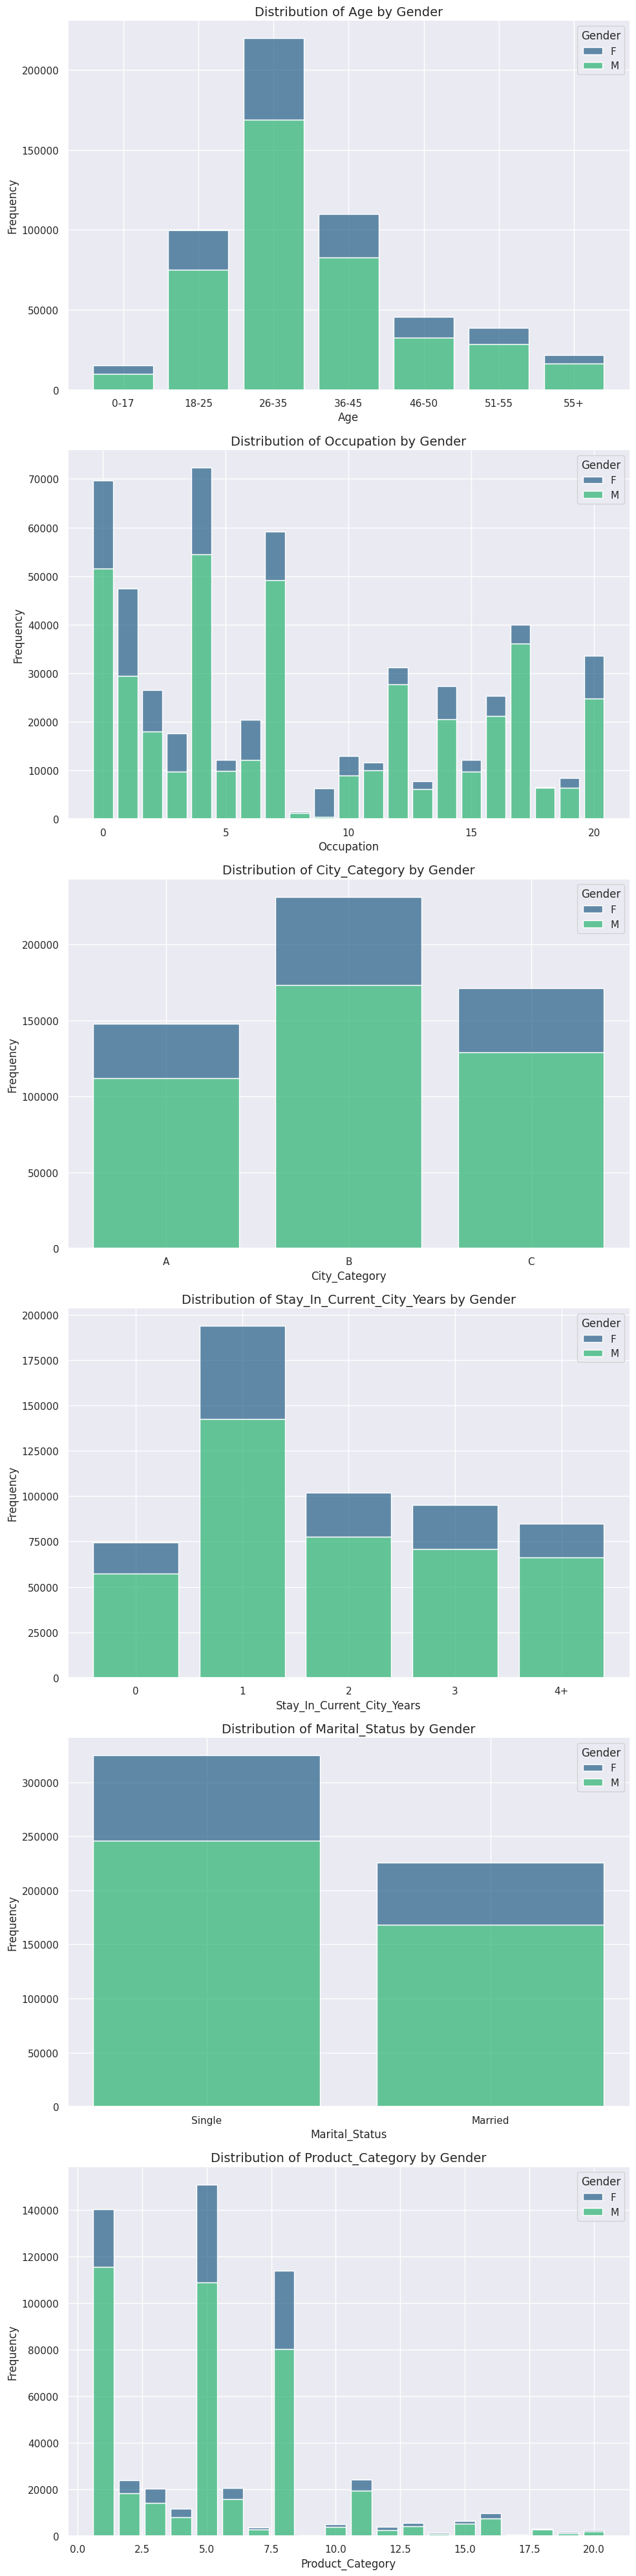

In [ ]:
# Let's make a list of columns
cols = ['Age','Occupation', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status','Product_Category']

plt.figure(figsize=(10, 40))
sns.set(style='darkgrid')

# Plot each categorical column
for i, col in enumerate(cols, 1):
    plt.subplot(6, 1, i)
    sns.histplot(data= walmart_df, x=col, hue='Gender', palette='viridis', legend=True, multiple='stack', shrink=0.8)
    sns.despine()

    # Set labels and title
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of {col} by Gender', fontsize=14, fontfamily='sans-serif')

    plt.tight_layout()

plt.show()


#### **Insights:**

##### **Gender-Related Purchase Analysis:**

  Across various age groups, males tend to have higher purchase counts compared to females, with the age group '26-35' showing the most significant difference.

##### **Occupation-Related Purchase Analysis:**

  Occupations '0' and '4' show the highest purchase counts, suggesting that individuals in these occupations contribute significantly to overall sales, with '4' having notably higher purchases than others.

##### **City Category-Related Purchase Analysis:**

  City_Category 'B' has the highest purchase counts for both genders, indicating that customers residing in City_Category 'B' contribute significantly to overall sales compared to 'A' and 'C'.

##### **Stay in Current City Duration Impact:**

  Customers who have stayed in their current city for 1 year exhibit the highest purchase counts, suggesting that individuals with a 1-year residence duration have a higher tendency to make purchases compared to other durations.

##### **Marital Status-Related Purchase Analysis:**

  Individuals with a marital status of 'Single' have higher purchase counts compared to those who are 'Married', indicating that single individuals contribute more to overall sales.

##### **Product Category-Related Purchase Analysis:**

  Product Category '1' has the highest purchase counts, indicating that it significantly contributes to overall sales. Product Categories '5' and '8' also show notable purchase counts.



##### **Sub Task3: Multivariate Analysis**

                                   Gender            Age  Occupation  \
Gender                                NaN  4.275057e-302         0.0   
Age                         4.275057e-302            NaN         0.0   
Occupation                   0.000000e+00   0.000000e+00         NaN   
City_Category                5.097590e-08   0.000000e+00         0.0   
Stay_In_Current_City_Years  2.423942e-190   0.000000e+00         0.0   
Marital_Status               7.800919e-18   0.000000e+00         0.0   
Product_Category             0.000000e+00   0.000000e+00         0.0   

                            City_Category  Stay_In_Current_City_Years  \
Gender                       5.097590e-08               2.423942e-190   
Age                          0.000000e+00                0.000000e+00   
Occupation                   0.000000e+00                0.000000e+00   
City_Category                         NaN                0.000000e+00   
Stay_In_Current_City_Years   0.000000e+00                 

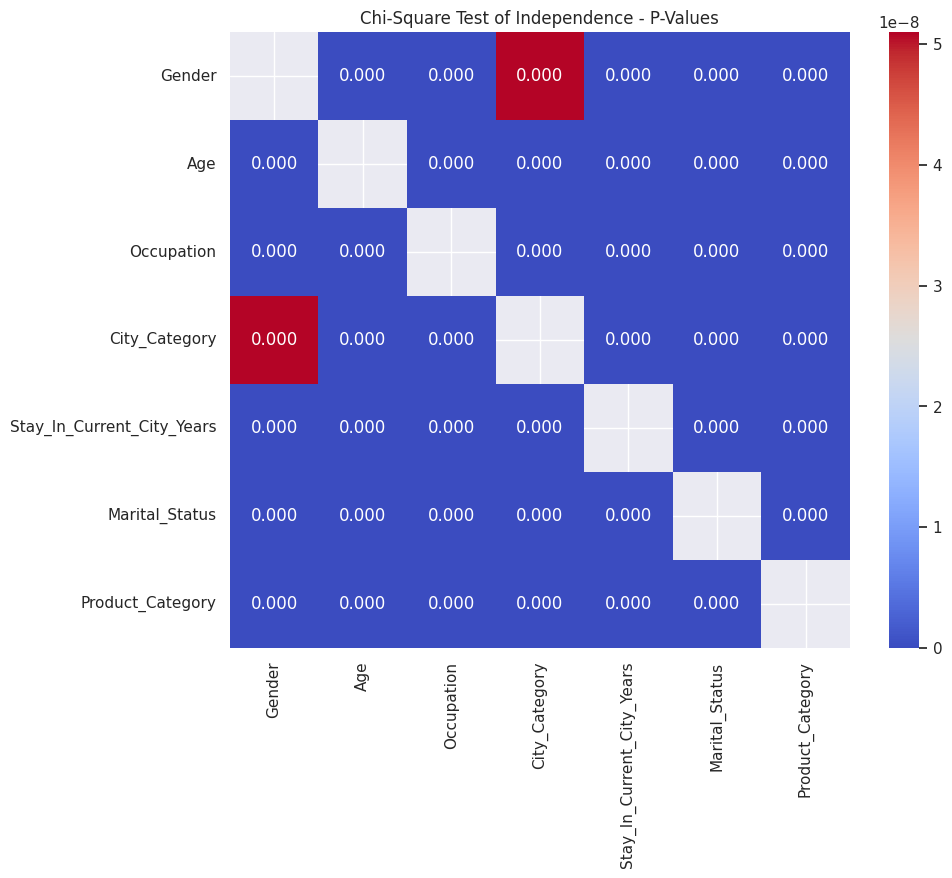

In [ ]:
# List of categorical columns to test
categorical_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

# Initialize an empty DataFrame to store p-values
p_values = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Loop through pairs of columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(walmart_df[col1], walmart_df[col2])
            # Perform Chi-Square test
            _, p, _, _ = chi2_contingency(contingency_table)
            # Store the p-value
            p_values.loc[col1, col2] = p

# Convert p-values to float
p_values = p_values.astype(float)
print(p_values)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Chi-Square Test of Independence - P-Values')
plt.show()

##### **The heatmap displays the p value of different variables and their association with eachother. Given the p-values are very less, there are significant association between the variables.**

In [ ]:
# Let's do some indepth analysis
#Let's check the average amount spent on each transaction per gender

avg_purchase = walmart_df.groupby('Gender')[['Purchase']].mean().reset_index().round(2)
print(avg_purchase)


#Let's get gender wise count
print(f'Male customers - {len(walmart_df[walmart_df["Gender"]== "M"])}')
print(f'Female customers - {len(walmart_df[walmart_df["Gender"]== "F"])}')

  Gender  Purchase
0      F   8734.57
1      M   9437.53
Male customers - 414259
Female customers - 135809


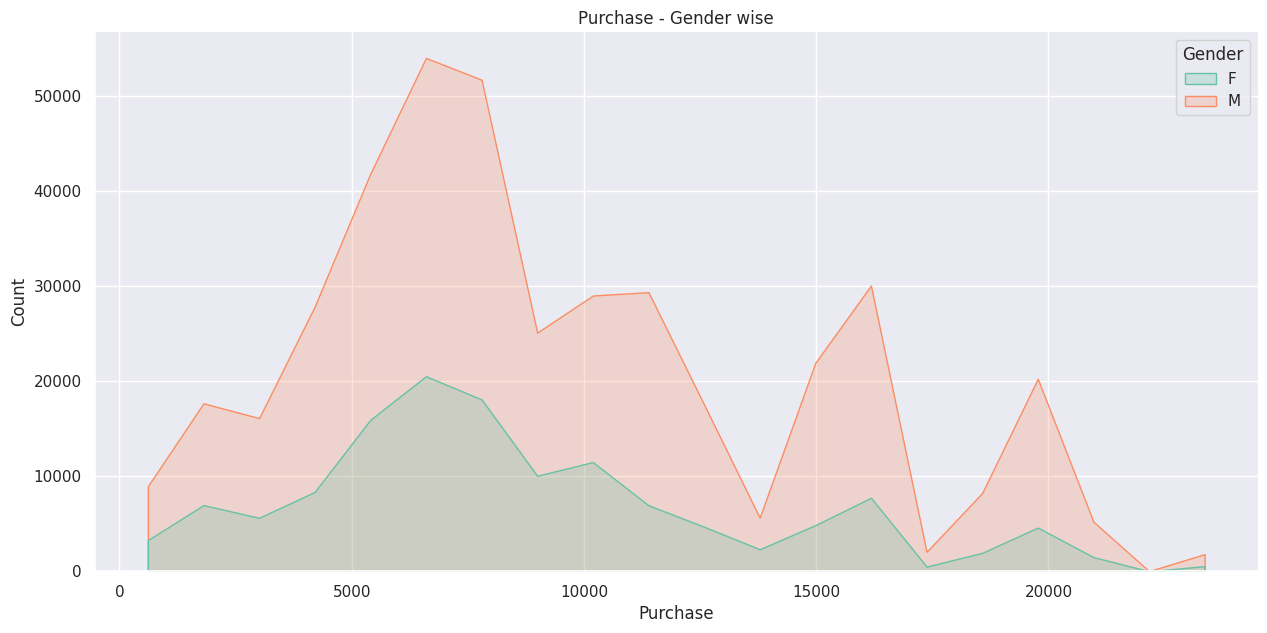

In [ ]:
plt.figure(figsize=(15,7))
sns.set(style='darkgrid')
sns.histplot(data= walmart_df, x = "Purchase", bins=20, hue = "Gender",element='poly',palette= 'Set2')
sns.despine()
plt.title('Purchase - Gender wise')
plt.show()

#### **Insights**

##### *The average amount spent by male customers (9437) is higher than the average amount spent by female customers (8734).

##### *With a larger male customer base, it is likely that men will make more purchases compared to females.

##### **SubTask 4: Indepth Analysis using CLT & Confidence Interval for 'Gender', 'Marital_Status' & 'Age'**

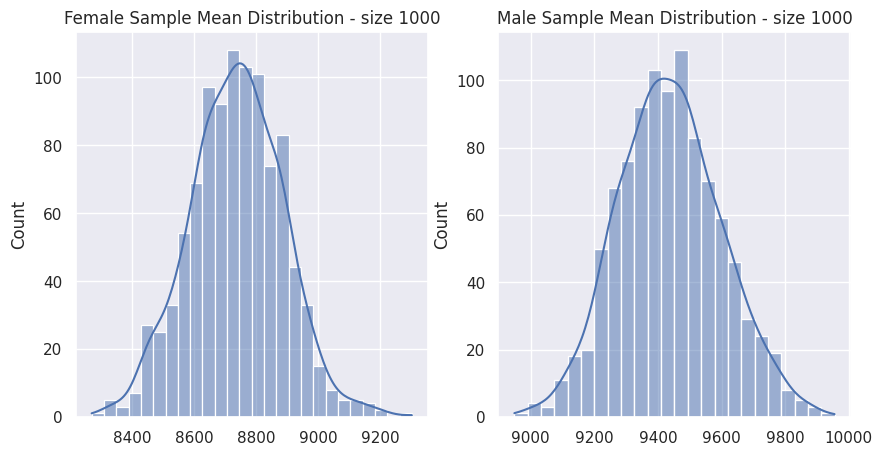

for significance levels of [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
Female_mean_range is: [(8541.37, 8927.76), (8486.6, 8982.53), (8424.96, 9044.17), (8383.86, 9085.27), (8346.25, 9122.88)]
Male_mean_range is: [(9231.16, 9643.89), (9172.66, 9702.4), (9106.81, 9768.24), (9062.92, 9812.14), (9022.74, 9852.31)]
Female - Population Mean:  8734.57  sample mean:  8737.14
Female - population-Standard deviation: 4767.23  sample-standard deviation: 150.14
Male - Population Mean:  9437.53  sample mean:  9437.3
Male - Population-Standard deviation: 5092.19  sample-standard deviation: 161.0
---------------------------------------------------------------------------------


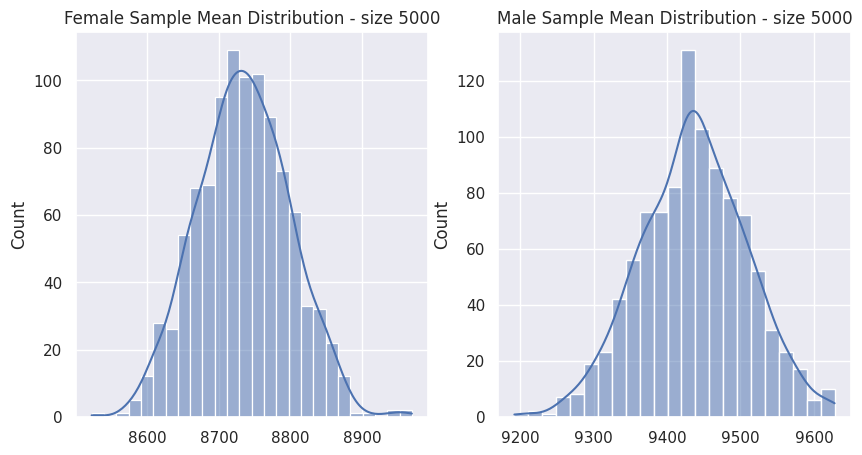

for significance levels of [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
Female_mean_range is: [(8648.17, 8820.97), (8623.67, 8845.46), (8596.1, 8873.03), (8577.73, 8891.41), (8560.91, 8908.23)]
Male_mean_range is: [(9345.24, 9529.82), (9319.07, 9555.98), (9289.63, 9585.43), (9270.0, 9605.06), (9252.03, 9623.02)]
Female - Population Mean:  8734.57  sample mean:  8734.84
Female - population-Standard deviation: 4767.23  sample-standard deviation: 64.32
Male - Population Mean:  9437.53  sample mean:  9436.43
Male - Population-Standard deviation: 5092.19  sample-standard deviation: 72.37
---------------------------------------------------------------------------------


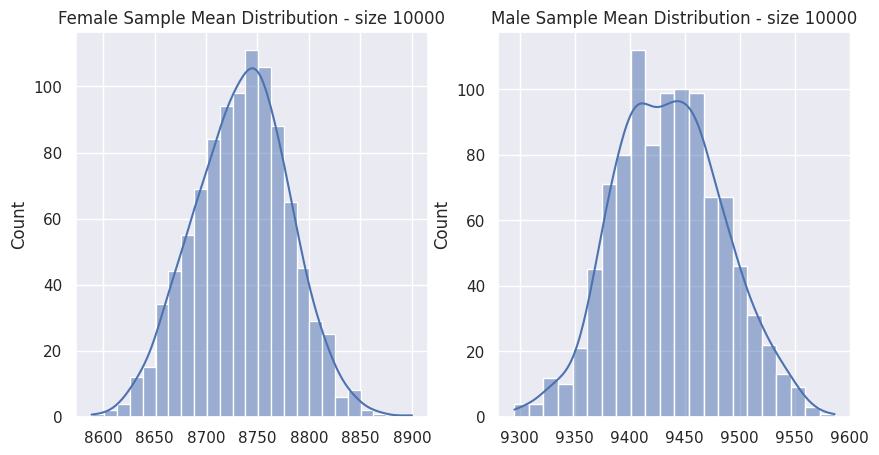

for significance levels of [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
Female_mean_range is: [(8673.47, 8795.66), (8656.15, 8812.98), (8636.66, 8832.47), (8623.66, 8845.47), (8611.77, 8857.36)]
Male_mean_range is: [(9372.27, 9502.79), (9353.77, 9521.29), (9332.95, 9542.11), (9319.06, 9555.99), (9306.36, 9568.69)]
Female - Population Mean:  8734.57  sample mean:  8734.72
Female - population-Standard deviation: 4767.23  sample-standard deviation: 45.95
Male - Population Mean:  9437.53  sample mean:  9436.07
Male - Population-Standard deviation: 5092.19  sample-standard deviation: 48.99
---------------------------------------------------------------------------------


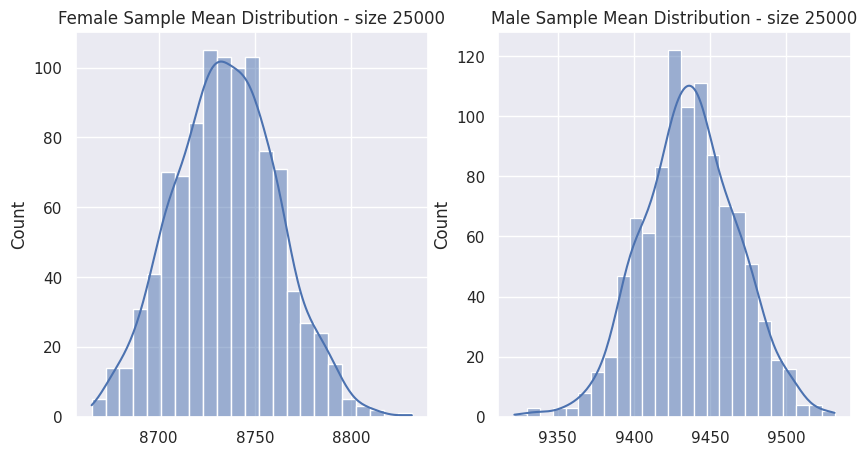

for significance levels of [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
Female_mean_range is: [(8695.93, 8773.21), (8684.97, 8784.16), (8672.64, 8796.49), (8664.42, 8804.71), (8656.9, 8812.23)]
Male_mean_range is: [(9396.25, 9478.8), (9384.55, 9490.5), (9371.38, 9503.67), (9362.6, 9512.45), (9354.57, 9520.48)]
Female - Population Mean:  8734.57  sample mean:  8735.0
Female - population-Standard deviation: 4767.23  sample-standard deviation: 26.79
Male - Population Mean:  9437.53  sample mean:  9436.77
Male - Population-Standard deviation: 5092.19  sample-standard deviation: 31.23
---------------------------------------------------------------------------------


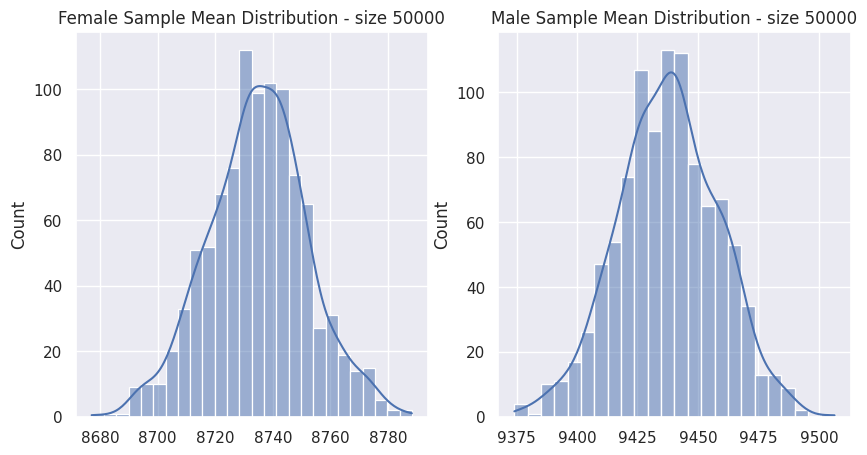

for significance levels of [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
Female_mean_range is: [(8707.24, 8761.89), (8699.5, 8769.63), (8690.78, 8778.35), (8684.97, 8784.16), (8679.65, 8789.48)]
Male_mean_range is: [(9408.34, 9466.71), (9400.07, 9474.98), (9390.76, 9484.3), (9384.55, 9490.5), (9378.87, 9496.19)]
Female - Population Mean:  8734.57  sample mean:  8734.87
Female - population-Standard deviation: 4767.23  sample-standard deviation: 17.21
Male - Population Mean:  9437.53  sample mean:  9437.75
Male - Population-Standard deviation: 5092.19  sample-standard deviation: 20.76
---------------------------------------------------------------------------------


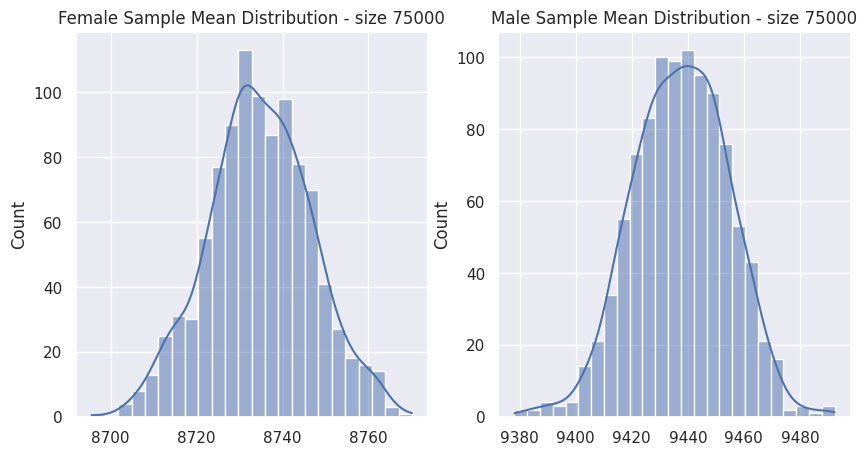

for significance levels of [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
Female_mean_range is: [(8712.26, 8756.87), (8705.93, 8763.2), (8698.82, 8770.32), (8694.07, 8775.06), (8689.73, 8779.4)]
Male_mean_range is: [(9413.7, 9461.36), (9406.94, 9468.11), (9399.34, 9475.71), (9394.27, 9480.78), (9389.63, 9485.42)]
Female - Population Mean:  8734.57  sample mean:  8734.74
Female - population-Standard deviation: 4767.23  sample-standard deviation: 11.99
Male - Population Mean:  9437.53  sample mean:  9437.56
Male - Population-Standard deviation: 5092.19  sample-standard deviation: 17.02
---------------------------------------------------------------------------------


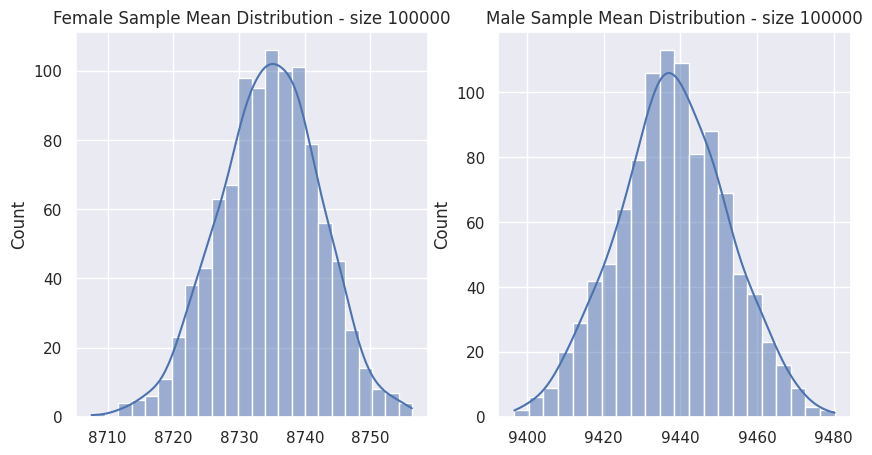

for significance levels of [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
Female_mean_range is: [(8715.25, 8753.89), (8709.77, 8759.36), (8703.6, 8765.53), (8699.5, 8769.64), (8695.73, 8773.4)]
Male_mean_range is: [(9416.89, 9458.16), (9411.04, 9464.01), (9404.45, 9470.6), (9400.07, 9474.99), (9396.05, 9479.0)]
Female - Population Mean:  8734.57  sample mean:  8734.59
Female - population-Standard deviation: 4767.23  sample-standard deviation: 7.64
Male - Population Mean:  9437.53  sample mean:  9437.98
Male - Population-Standard deviation: 5092.19  sample-standard deviation: 14.34
---------------------------------------------------------------------------------


In [ ]:
df_gender = pd.DataFrame(walmart_df.groupby('Gender')['Purchase'].mean()).reset_index(inplace = True)
df_gender
df_gender_m = walmart_df[walmart_df['Gender']== 'M']
df_gender_f = walmart_df[walmart_df['Gender']== 'F']

def x_bar(sig, mu, S, n):
  list_ = []
  for i in sig:
    z1 = stats.norm.ppf(i)
    z2 = stats.norm.ppf(1-i)
    x1 = ((z1*S/math.sqrt(n))+mu)
    x2 = ((z2*S/math.sqrt(n))+mu)
    a = (round(x1,2),round(x2,2))
    list_.append(a)
  return list_ # Fixed indentation here


sample_sizes = [1000,5000,10000,25000,50000,75000,100000]
s_level = [0.1, 0.05, 0.02, 0.01, 0.005]
for sampling in sample_sizes:
 # sampling = 1000
 f_mean = []
 m_mean = []
 for i in range(1,1000):
  f_sampled = df_gender_f['Purchase'].sample(sampling)
  m_sampled = df_gender_m['Purchase'].sample(sampling)
  f_mean.append(f_sampled.mean())
  m_mean.append(m_sampled.mean())

 fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
 sns.histplot(f_mean,kde=True,ax=ax[0]).set(title=f'Female Sample Mean Distribution - size {sampling}')
 sns.histplot(m_mean,kde=True,ax=ax[1]).set(title=f'Male Sample Mean Distribution - size {sampling}')
 plt.show()


 # print('At Significance level of ',s_level)
 x1 = df_gender_f['Purchase'].mean()
 x2 = df_gender_m['Purchase'].mean()
 x1_std = df_gender_f['Purchase'].std()
 x2_std = df_gender_m['Purchase'].std()

 print('for significance levels of', [(0.1,1-0.1), (0.05,1-0.05), (0.02,1-0.02), (0.01,1-0.01), (0.005,1-0.005)])
 print('Female_mean_range is:', x_bar(s_level, x1, x1_std, sampling))
 print('Male_mean_range is:', x_bar(s_level, x2, x2_std, sampling))

 # delta =
 print('Female - Population Mean: ',round(x1,2), ' sample mean: ',round(np.mean(f_mean),2)),
 print('Female - population-Standard deviation:', round(x1_std,2), ' sample-standard deviation:', round(np.std(f_mean),2))
 print('Male - Population Mean: ',round(x2,2), ' sample mean: ',round(np.mean(m_mean),2))
 print('Male - Population-Standard deviation:', round(x2_std,2), ' sample-standard deviation:', round(np.std(m_mean),2 ))
 # print('mmean_population: ',np.mean(m_mean),'standard deviation:', np.std(m_mean))
 print("---------------------------------------------------------------------------------")

#### **Insights**
##### *On Average, Men Spend More than Women with a confidence interval of 99.5% when the sample size is above 5000. We can clearly see that for confidence intervals of 90%, 95%, 98%, 99%, and 99.5%, the mean ranges of men and women do not overlap. With a Sample size of 1000, we can say Men spend more than women on average with 98% confidence. For significance levels of 99% and above for a sample size of 1000, the mean ranges of men and women do overlap.

##### *With a confidence of 98%, with the evidence provided for sample means with a sample size of 1000: Men spend more than Women on average. With a confidence of 99.5%, with the evidence provided for sample means with a sample size of 5000 and above: Men spend more than Women on average.

##### *The distribution of mean resembles a Normal Gaussian Distribution as shown in the figures above for both the Male and Female Population

##### *Confidence Intervals are not overlapping for sample sizes greater than or equal to 5000. However, when the sample size was 1000, we can see that male and female spending overlapped for 99% and above confidence intervals and did not overlap for 98% and below confidence intervals Walmart can focus on improving Female spending by focusing on female-specific marketing campaigns.

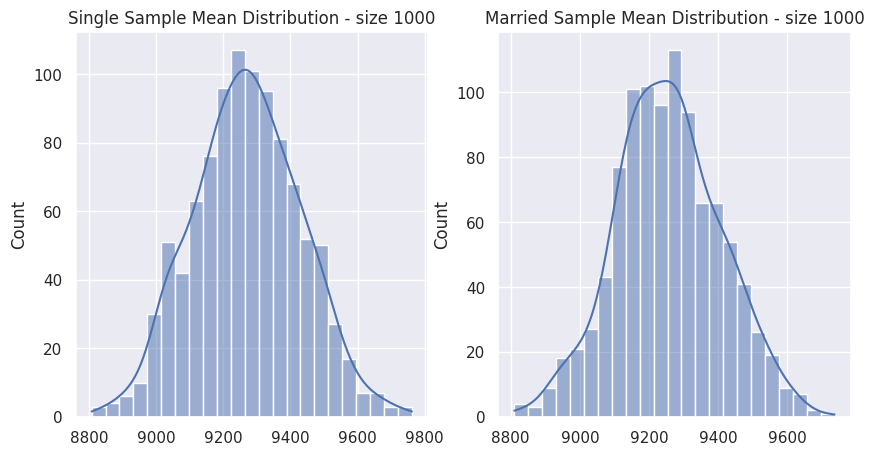

for significance levels of [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
Single_mean_range is: [(9062.17, 9469.65), (9004.41, 9527.4), (8939.41, 9592.41), (8896.07, 9635.75), (8856.41, 9675.41)]
Married_mean_range is: [(9057.86, 9464.49), (9000.22, 9522.13), (8935.35, 9587.0), (8892.1, 9630.25), (8852.52, 9669.83)]
Single - Population Mean:  9265.91  sample mean:  8734.59
Single - population-Standard deviation: 5027.35  sample-standard deviation: 7.64
Married - Population Mean:  9261.17  sample mean:  9256.12
Married - Population-Standard deviation: 5016.9  sample-standard deviation: 152.19
---------------------------------------------------------------------------------


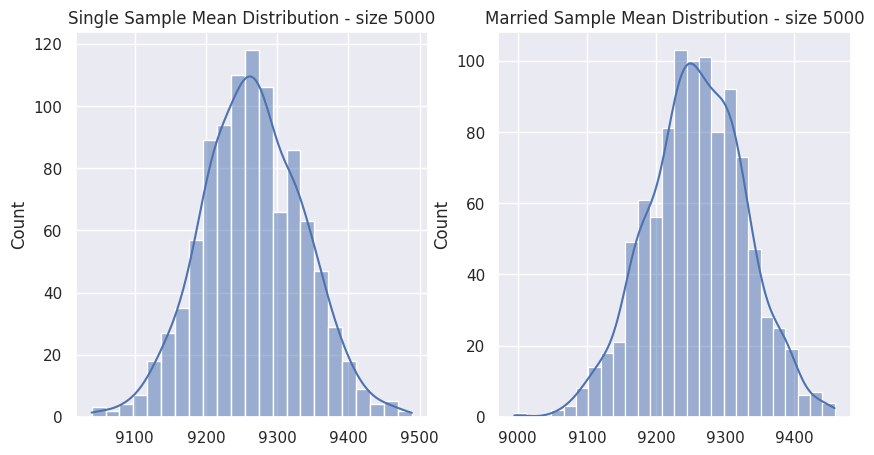

for significance levels of [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
Single_mean_range is: [(9174.79, 9357.02), (9148.96, 9382.85), (9119.89, 9411.92), (9100.51, 9431.3), (9082.77, 9449.04)]
Married_mean_range is: [(9170.25, 9352.1), (9144.47, 9377.88), (9115.46, 9406.89), (9096.12, 9426.23), (9078.42, 9443.93)]
Single - Population Mean:  9265.91  sample mean:  8734.59
Single - population-Standard deviation: 5027.35  sample-standard deviation: 7.64
Married - Population Mean:  9261.17  sample mean:  9258.96
Married - Population-Standard deviation: 5016.9  sample-standard deviation: 70.14
---------------------------------------------------------------------------------


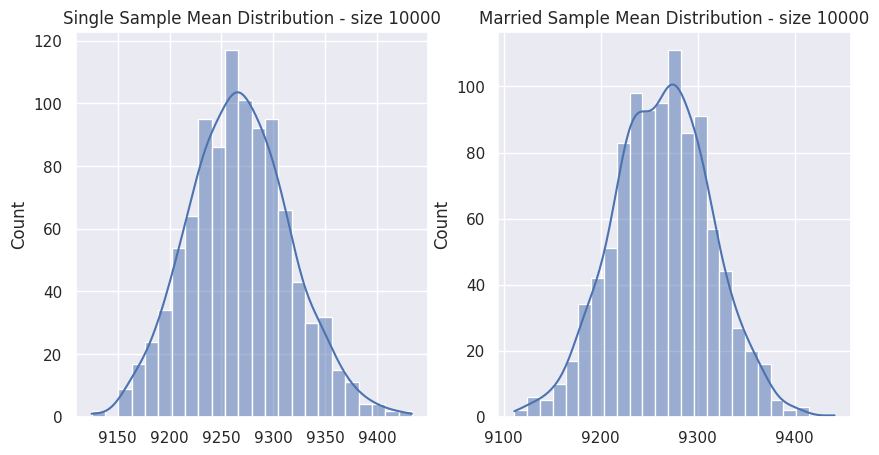

for significance levels of [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
Single_mean_range is: [(9201.48, 9330.34), (9183.22, 9348.6), (9162.66, 9369.16), (9148.95, 9382.86), (9136.41, 9395.4)]
Married_mean_range is: [(9196.88, 9325.47), (9178.65, 9343.7), (9158.14, 9364.21), (9144.46, 9377.89), (9131.95, 9390.4)]
Single - Population Mean:  9265.91  sample mean:  8734.59
Single - population-Standard deviation: 5027.35  sample-standard deviation: 7.64
Married - Population Mean:  9261.17  sample mean:  9263.42
Married - Population-Standard deviation: 5016.9  sample-standard deviation: 50.03
---------------------------------------------------------------------------------


In [ ]:
# Let's perform similar activity with Marital Status
df_marital_status = pd.DataFrame(walmart_df.groupby('Marital_Status')['Purchase'].mean()).reset_index(inplace = True)
df_marital_status
df_status_s = walmart_df[walmart_df['Marital_Status']== 'Single']
df_status_m = walmart_df[walmart_df['Marital_Status']== 'Married']

def x_bar(sig, mu, S, n):
  list_ = []
  for i in sig:
    z1 = stats.norm.ppf(i)
    z2 = stats.norm.ppf(1-i)
    x1 = ((z1*S/math.sqrt(n))+mu)
    x2 = ((z2*S/math.sqrt(n))+mu)
    a = (round(x1,2),round(x2,2))
    list_.append(a)
  return list_ # Fixed indentation here


sample_sizes = [1000,5000,10000]
s_level = [0.1, 0.05, 0.02, 0.01, 0.005]
for sampling in sample_sizes:
 # sampling = 1000
 s_mean = []
 m_mean = []
 for i in range(1,1000):
  s_sampled = df_status_s['Purchase'].sample(sampling)
  m_sampled = df_status_m['Purchase'].sample(sampling)
  s_mean.append(s_sampled.mean())
  m_mean.append(m_sampled.mean())

 fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
 sns.histplot(s_mean,kde=True,ax=ax[0]).set(title=f'Single Sample Mean Distribution - size {sampling}')
 sns.histplot(m_mean,kde=True,ax=ax[1]).set(title=f'Married Sample Mean Distribution - size {sampling}')
 plt.show()


 # print('At Significance level of ',s_level)
 x1 = df_status_s['Purchase'].mean()
 x2 = df_status_m['Purchase'].mean()
 x1_std = df_status_s['Purchase'].std()
 x2_std = df_status_m['Purchase'].std()

 print('for significance levels of', [(0.1,1-0.1), (0.05,1-0.05), (0.02,1-0.02), (0.01,1-0.01), (0.005,1-0.005)])
 print('Single_mean_range is:', x_bar(s_level, x1, x1_std, sampling))
 print('Married_mean_range is:', x_bar(s_level, x2, x2_std, sampling))

 # delta =
 print('Single - Population Mean: ',round(x1,2), ' sample mean: ',round(np.mean(f_mean),2)),
 print('Single - population-Standard deviation:', round(x1_std,2), ' sample-standard deviation:', round(np.std(f_mean),2))
 print('Married - Population Mean: ',round(x2,2), ' sample mean: ',round(np.mean(m_mean),2))
 print('Married - Population-Standard deviation:', round(x2_std,2), ' sample-standard deviation:', round(np.std(m_mean),2 ))
 # print('mmean_population: ',np.mean(m_mean),'standard deviation:', np.std(m_mean))
 print("---------------------------------------------------------------------------------")

#### **Insights**

##### *With the sample size of 1000 both the single and married sample mean distributions  are normally distributed and centered around similar means, suggesting little difference in central tendency between the two groups.

##### *With sample size of 5000, both the single and married sample mean distributions remain normally distributed, with their means closely aligned and exhibiting minimal variation between the two groups.

##### *Both single and married sample mean distributions with a larger sample size of 10,000 continue to represent normal distributions, with closely aligned means and a slight decrease in spread, indicating greater precision in estimating the true population mean for both groups.

##### *For sample size of 1000 and above, Married and Single average range intersect for confidence intervals of 90% and above.

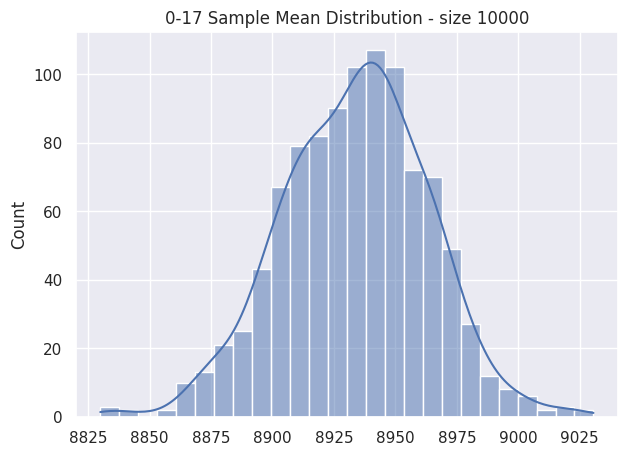

For Age Group: 0-17
Significance levels: [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
0-17_mean_range: [(8867.96, 8998.97), (8849.39, 9017.53), (8828.5, 9038.43), (8814.56, 9052.37), (8801.81, 9065.12)]
0-17 - Population Mean:  8933.46  Sample Mean:  8933.7
0-17 - Population Standard Deviation: 5111.11  Sample Standard Deviation: 29.59
---------------------------------------------------------------------------------


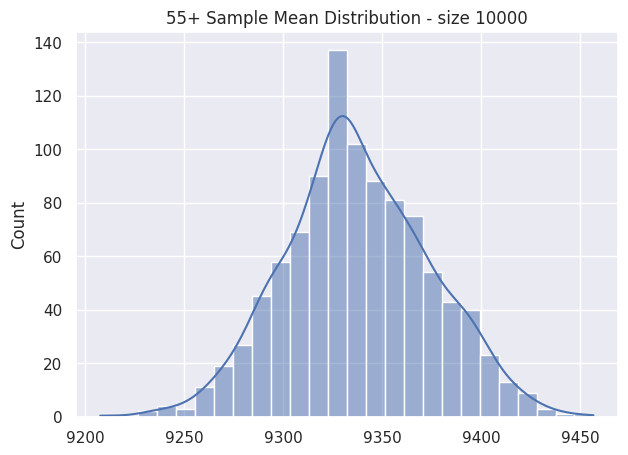

For Age Group: 55+
Significance levels: [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
55+_mean_range: [(9272.06, 9400.51), (9253.85, 9418.71), (9233.36, 9439.2), (9219.7, 9452.87), (9207.19, 9465.37)]
55+ - Population Mean:  9336.28  Sample Mean:  9337.55
55+ - Population Standard Deviation: 5011.49  Sample Standard Deviation: 36.53
---------------------------------------------------------------------------------


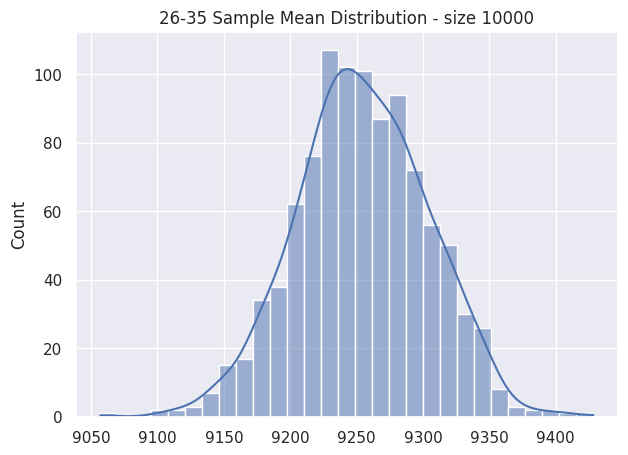

For Age Group: 26-35
Significance levels: [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
26-35_mean_range: [(9188.48, 9316.9), (9170.27, 9335.11), (9149.79, 9355.59), (9136.13, 9369.25), (9123.63, 9381.75)]
26-35 - Population Mean:  9252.69  Sample Mean:  9254.28
26-35 - Population Standard Deviation: 5010.53  Sample Standard Deviation: 49.34
---------------------------------------------------------------------------------


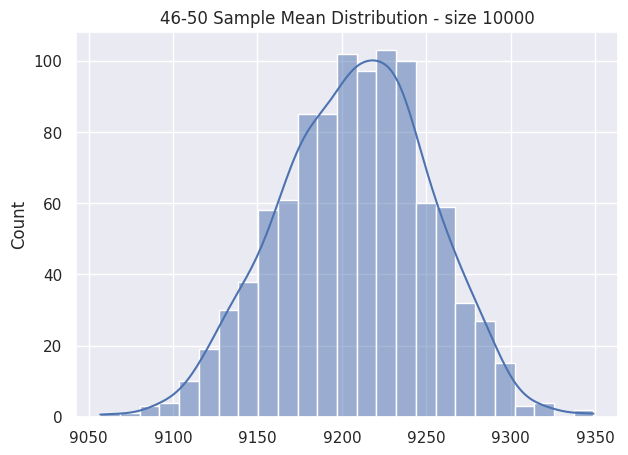

For Age Group: 46-50
Significance levels: [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
46-50_mean_range: [(9144.97, 9272.28), (9126.92, 9290.33), (9106.61, 9310.64), (9093.07, 9324.18), (9080.68, 9336.57)]
46-50 - Population Mean:  9208.63  Sample Mean:  9207.66
46-50 - Population Standard Deviation: 4967.22  Sample Standard Deviation: 44.26
---------------------------------------------------------------------------------


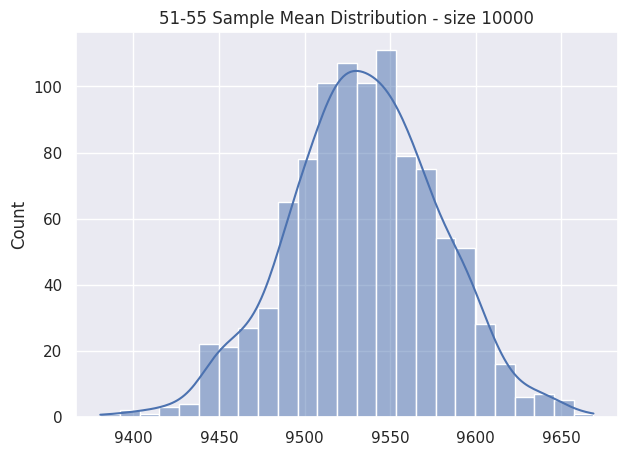

For Age Group: 51-55
Significance levels: [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
51-55_mean_range: [(9469.61, 9600.01), (9451.13, 9618.49), (9430.33, 9639.29), (9416.46, 9653.16), (9403.77, 9665.85)]
51-55 - Population Mean:  9534.81  Sample Mean:  9534.69
51-55 - Population Standard Deviation: 5087.37  Sample Standard Deviation: 43.48
---------------------------------------------------------------------------------


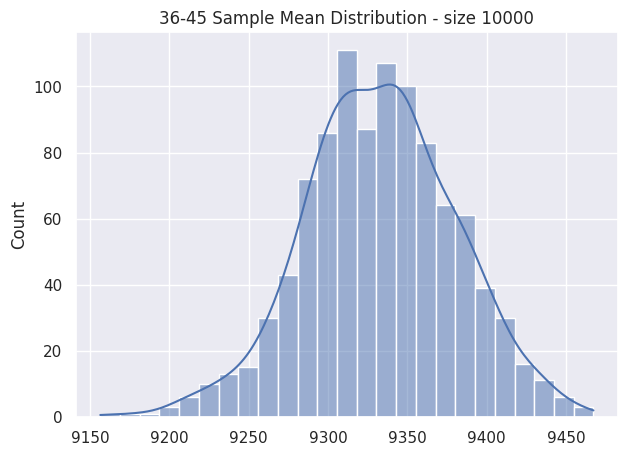

For Age Group: 36-45
Significance levels: [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
36-45_mean_range: [(9266.98, 9395.72), (9248.73, 9413.97), (9228.19, 9434.51), (9214.5, 9448.2), (9201.97, 9460.73)]
36-45 - Population Mean:  9331.35  Sample Mean:  9332.74
36-45 - Population Standard Deviation: 5022.92  Sample Standard Deviation: 47.5
---------------------------------------------------------------------------------


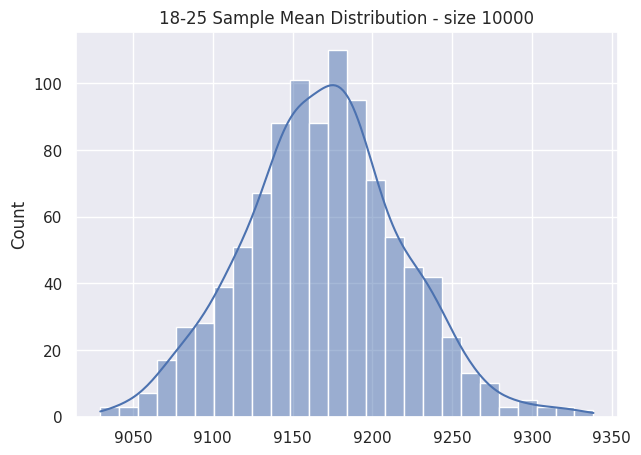

For Age Group: 18-25
Significance levels: [(0.1, 0.9), (0.05, 0.95), (0.02, 0.98), (0.01, 0.99), (0.005, 0.995)]
18-25_mean_range: [(9105.15, 9234.18), (9086.86, 9252.47), (9066.27, 9273.06), (9052.55, 9286.78), (9039.99, 9299.34)]
18-25 - Population Mean:  9169.66  Sample Mean:  9169.2
18-25 - Population Standard Deviation: 5034.32  Sample Standard Deviation: 49.03
---------------------------------------------------------------------------------


In [ ]:
# Let's perform similar activity with Age
# Before that let's create a list of the age groups
age_groups = walmart_df['Age'].unique()

# Function for confidence intervals
def x_bar(sig, mu, S, n):
    list_ = []
    for i in sig:
        z1 = stats.norm.ppf(i)
        z2 = stats.norm.ppf(1-i)
        x1 = ((z1*S/math.sqrt(n))+mu)
        x2 = ((z2*S/math.sqrt(n))+mu)
        a = (round(x1, 2), round(x2, 2))
        list_.append(a)
    return list_

sample_sizes = [10000]
s_level = [0.1, 0.05, 0.02, 0.01, 0.005]

# Loop through each sample size and age group
for sampling in sample_sizes:
    for age_group in age_groups:
        age_mean = []
        for i in range(1, 1000):
            age_sampled = walmart_df[walmart_df['Age'] == age_group]['Purchase'].sample(sampling)
            age_mean.append(age_sampled.mean())

        fig, ax = plt.subplots(figsize=(7, 5))
        sns.histplot(age_mean, kde=True, ax=ax).set(title=f'{age_group} Sample Mean Distribution - size {sampling}')
        plt.show()

        # Print statistics for each age group
        x = walmart_df[walmart_df['Age'] == age_group]['Purchase'].mean()
        x_std = walmart_df[walmart_df['Age'] == age_group]['Purchase'].std()

        print(f'For Age Group: {age_group}')
        print('Significance levels:', [(0.1, 1-0.1), (0.05, 1-0.05), (0.02, 1-0.02), (0.01, 1-0.01), (0.005, 1-0.005)])
        print(f'{age_group}_mean_range:', x_bar(s_level, x, x_std, sampling))
        print(f'{age_group} - Population Mean: ', round(x, 2), ' Sample Mean: ', round(np.mean(age_mean), 2))
        print(f'{age_group} - Population Standard Deviation:', round(x_std, 2), ' Sample Standard Deviation:', round(np.std(age_mean), 2))
        print("---------------------------------------------------------------------------------")


#### **Insights**

##### *for sample size of 10000 :
##### 1. With 99% confidence, the mean spending of the Age band 0 to 17 years is less compared to the mean spending of Other Age bands

##### 2. With 95% confidence, the mean spending of the Age band 51 to 55 Years is high compared to the mean spending of Other Age bands. The confidence interval increases to 99% for sample sizes of 14000 and above.

##### 3. Among Other Age Bands: Other Age bands are overlapping at 90% confidence intervals. However, some are dominating other Age bands.

#### **Task 5: Actionable Insights**

##### **Customer Profile:**

##### *Dominant Customer: Male, aged 26-35, residing in City Category B, with occupation 4.
##### *High-Spending Segment: Males spend significantly more than females(approx. 3times).
##### *Purchase Behavior: Customers staying in a city for over a year tend to spend more. Singles tend to purchase more frequently than married individuals.

#### **Product Performance**

##### Top-Selling Categories: Product categories 1 and 5 drive the highest sales.
##### Customer Preferences: Understanding the correlation between product categories and customer demographics can lead to targeted product recommendations.

#### **Geographic Insights**

##### Key Market: City Category B shows the highest purchase volume and should be a focus for expansion or marketing efforts.

#### **Task 6: Recommendations**

##### * Focus on Males should be more through tailor marketing and product offerings as they drive the majority of sales.
##### * The age group 26-35(Youngsters) is most active in purchase so focus should be more in retaining and targeting this group.
##### * As significant portion of transaction comes from customers who have stayed a little more than 1 year, it will provide opportunity to acquire new entrants through loyalty programs, welcoming offer or incentives.
##### * Tailored promotions should be done to resonate with the customer preference in City_Category B.
##### * As per our analysis, as Singles drive more sales, so focus should be more in understanding their motivation behind it and targeting them for even higher revenue.
##### * More focus should be given towards product category 1 & 5 as they exhibit higher purchase amounts.

##### * As a whole, emphasis should be given towards analyzing the product preferences of male customers to inform product development, ensuring that the product range aligns with the preferences of the larger male customer base, leading to increased sales.